# **EDA on used USA vehicles listed on Craiglist**

![fe_1119161_1600.webp](https://i.imgur.com/wvrSB7J.png)

**EDA or Exploratory Data Analysis can be understood as the process where datasets are explored , cleaned and analyzed (for insights) using various statistical methods and graphical representations.**

**The primary objectives of EDA are:**  

*   To uncover meaningful insights from the data.

*   Represent them with easy to comprehend visuallization techniques.

**Project Outline**

*  Download the Dataset 

*  Data Pre-processing & Cleaning

*  Exploratory Analysis and Visualization

*  Questions & Answers

*  Summary

*  Future Works

*  References

In [ ]:
pip install opendatasets --upgrade --quiet

## Download the **'Dataset'**

To start with the EDA - data is required, that is available on Kaggle. 
The dataset can be downloaded using [opendatasets](https://github.com/JovianML/opendatasets) module from github and the [dataset url](https://www.kaggle.com/austinreese/craigslist-carstrucks-data) from Kaggle.

In [ ]:
# On executing this cell , you will be prompted to enter kaggle credentials like username and key that can be viewed from your Kaggle profile.
import opendatasets as od

dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omrahulpandey
Your Kaggle Key: ··········


100%|██████████| 262M/262M [00:02<00:00, 121MB/s]


In [ ]:
import os

In [ ]:
data_dir = 'craigslist-carstrucks-data'

In [ ]:
os.listdir(data_dir)

['vehicles.csv']

Before the dataset can be used, it has to be first loaded from the downloaded directory into a pandas dataframe. 

Thereafter various operations can be performed on the dataframe to attain the desired information from the data.

In [ ]:
import pandas as pd

In [ ]:
vehicles_raw_df = pd.read_csv(data_dir + '/vehicles.csv')

The contents of the dataframe can be loaded by simply passing the dataframe name. However as the number of rows maybe large, only the first and last few rows of the dataframe will be loaded.

In [ ]:
vehicles_raw_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


## Data Pre-processing and Cleaning

After the dataset has been downloaded and loaded into a pandas dataframe, the dataframe needs to be explored so as the basic features of the dataset can be understood. 

In [ ]:
# The number of rows and columns in the dataframe
vehicles_raw_df.shape

(426880, 26)

In [ ]:
# List of columns names in the dataframe
vehicles_raw_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

According to the requirement of the project, we can either use all or select some of the columns from the dataframe and make a copy of the dataframe to be used for further processing.

In [ ]:
# Choosing some columns of our interest from the dataframe.
selected_columns = [
        'year',
        'model',
        'price',
        'manufacturer',
        'condition',
        'odometer',
        'paint_color',
        'cylinders',
        'size',
        'fuel',
        'region',
        'state',
        'lat',
        'long',
        'posting_date'                  
]

In [ ]:
# Making a copy so that any changes to the new dataframe do not alter the original dataframe
vehicles_df = vehicles_raw_df[selected_columns].copy()

In [ ]:
# Number of rows and columns in the new dataframe.
vehicles_df.shape

(426880, 15)

In [ ]:
# Infromation about the column name,  data-types, non-null value counts
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          425675 non-null  float64
 1   model         421603 non-null  object 
 2   price         426880 non-null  int64  
 3   manufacturer  409234 non-null  object 
 4   condition     252776 non-null  object 
 5   odometer      422480 non-null  float64
 6   paint_color   296677 non-null  object 
 7   cylinders     249202 non-null  object 
 8   size          120519 non-null  object 
 9   fuel          423867 non-null  object 
 10  region        426880 non-null  object 
 11  state         426880 non-null  object 
 12  lat           420331 non-null  float64
 13  long          420331 non-null  float64
 14  posting_date  426812 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 48.9+ MB


In [ ]:
# Statistical details of the dataframe.
vehicles_df.describe()

,year,price,odometer,lat,long
count,425675.000000,4.268800e+05,4.224800e+05,420331.000000,420331.000000
mean,2011.235191,7.519903e+04,9.804333e+04,38.493940,-94.748599
std,9.452120,1.218228e+07,2.138815e+05,5.841533,18.365462
min,1900.000000,0.000000e+00,0.000000e+00,-84.122245,-159.827728
25%,2008.000000,5.900000e+03,3.770400e+04,34.601900,-111.939847
50%,2013.000000,1.395000e+04,8.554800e+04,39.150100,-88.432600
75%,2017.000000,2.648575e+04,1.335425e+05,42.398900,-80.832039
max,2022.000000,3.736929e+09,1.000000e+07,82.390818,173.885502


###### Percentage of 'NaN' values per column in the dataset.

In [ ]:
# isna()- for identifying 'NaN' values, sum()- for aggregation and sort_values- for sorting the column values
missing_percentages = vehicles_df.isna().sum().sort_values(ascending=False) / len(vehicles_df)*100

#pd.DataFrame() - to convert dictionary into a dataframe
missing_percentages = pd.DataFrame( {'Columns':missing_percentages.index, 'percentage':missing_percentages.values})
missing_percentages

,Columns,percentage
0,size,71.767476
1,cylinders,41.622470
2,condition,40.785232
3,paint_color,30.501078
4,manufacturer,4.133714
5,lat,1.534155
6,long,1.534155
7,model,1.236179
8,odometer,1.030735
9,fuel,0.705819


Information from `missing_percentages` dataframe can be visualized using a horizontal bar plot.

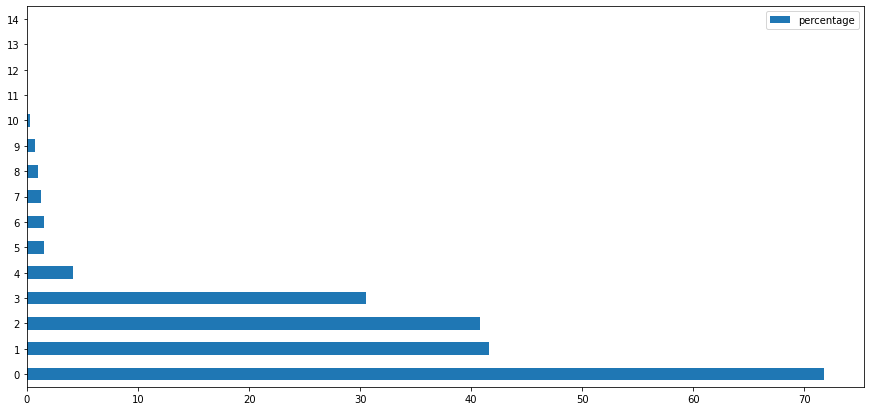

In [ ]:
missing_percentages.plot(kind='barh',figsize=(15,7))


As it can be seen from the graph, more than 70% of the values in `size` column are `NaN`. Therefore we can drop this column.

In [ ]:
vehicles_df.drop(['size'], axis=1)

,year,model,price,manufacturer,condition,odometer,paint_color,cylinders,fuel,region,state,lat,long,posting_date
0,NaN,NaN,6000,NaN,NaN,NaN,NaN,NaN,NaN,prescott,az,NaN,NaN,NaN
1,NaN,NaN,11900,NaN,NaN,NaN,NaN,NaN,NaN,fayetteville,ar,NaN,NaN,NaN
2,NaN,NaN,21000,NaN,NaN,NaN,NaN,NaN,NaN,florida keys,fl,NaN,NaN,NaN
3,NaN,NaN,1500,NaN,NaN,NaN,NaN,NaN,NaN,worcester / central MA,ma,NaN,NaN,NaN
4,NaN,NaN,4900,NaN,NaN,NaN,NaN,NaN,NaN,greensboro,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,2019.0,maxima s sedan 4d,23590,nissan,good,32226.0,NaN,6 cylinders,gas,wyoming,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,2020.0,s60 t5 momentum sedan 4d,30590,volvo,good,12029.0,red,NaN,gas,wyoming,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,2020.0,xt4 sport suv 4d,34990,cadillac,good,4174.0,white,NaN,diesel,wyoming,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,2018.0,es 350 sedan 4d,28990,lexus,good,30112.0,silver,6 cylinders,gas,wyoming,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


As the values for `cylinders` column are `str`, it needs to be converted to numeric values so that correlation can be established.

In [ ]:
vehicles_df = vehicles_df.assign(cylinders = lambda x: x['cylinders'].str.extract('(\d+)'))

In [ ]:
vehicles_df['cylinders'] = pd.to_numeric(vehicles_df.cylinders, errors = 'coerce')

In [ ]:
vehicles_df['cylinders'].unique()

array([nan,  8.,  6.,  4.,  5.,  3., 10., 12.])

In [ ]:
# Top 5 manufacturers from the vehicles_df dataframe.
top_manufacturer = vehicles_df['manufacturer'].value_counts().head()
top_manufacturer

ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: manufacturer, dtype: int64

Since the name of USA states are represented as lower case abbreviations, we will do the following:
  1. Capitalize the Abbreviations
  2. Download Abbreviation to full-names dataset from [here.](https://www.fonz.net/blog/archives/2008/04/06/csv-of-states-and-state-abbreviations/)
  3. Replace the values from the second to first dataframe.

In [ ]:
vehicles_df['state'] = vehicles_df['state'].str.upper()

In [ ]:
# All the USA states listed in the dataframe
vehicles_df['state'].unique()

array(['AZ', 'AR', 'FL', 'MA', 'NC', 'NY', 'OR', 'PA', 'TX', 'WA', 'WI',
       'AL', 'AK', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'HI', 'ID', 'IL',
       'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO',
       'MT', 'NE', 'NV', 'NJ', 'NM', 'NH', 'ND', 'OH', 'OK', 'RI', 'SC',
       'SD', 'TN', 'UT', 'VT', 'VA', 'WV', 'WY'], dtype=object)

In [ ]:
# Download the abbreviated-full state name dataset and store into a dataframe
states_df = pd.read_csv('http://www.fonz.net/blog/wp-content/uploads/2008/04/states.csv')
states_df

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [ ]:
# Extract all the values from the column `state`
values = list(states_df['State'])

# Extract all the values from the column `Abbreviation`
keys= list(states_df['Abbreviation'])

In [ ]:
# Replace the values to the `state` column and save it to dataframe.
vehicles_df['state'] = vehicles_df['state'].replace(keys, values)
vehicles_df['state']

0                Arizona
1               Arkansas
2                Florida
3          Massachusetts
4         North Carolina
               ...      
426875           Wyoming
426876           Wyoming
426877           Wyoming
426878           Wyoming
426879           Wyoming
Name: state, Length: 426880, dtype: object

## Exploratory Analysis and Visualization

Some basic plotting using `box plot`, `violin chart`, `sunburst chart`, `treemap` and `scatter plot` will be done to understand what maybe happening with the data. We can begin by importing all the required libraries like `seaborn`, `matplotlib` and `plotly`

In [ ]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
pd.options.plotting.backend = "plotly"

### **Distribution of Top 5 manufacturers from 2010 onwards**

In [ ]:
# Extract rows with manufacturers(ford, chevrolet, toyota, honda and nissan), (10000 < price < 300000), year (>2009)
df = vehicles_df.dropna()[((vehicles_df.manufacturer == 'ford') | (vehicles_df.manufacturer == 'chevrolet') | (vehicles_df.manufacturer == 'toyota') |  (vehicles_df.manufacturer == 'honda') | (vehicles_df.manufacturer == 'nissan')) & (vehicles_df.price > 10000) & (vehicles_df.price < 3000000) & (vehicles_df.year > 2009)]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,year,model,price,manufacturer,condition,odometer,paint_color,cylinders,size,fuel,region,state,lat,long,posting_date
31,2013.0,f-150 xlt,15000,ford,excellent,128000.0,black,6.0,full-size,gas,auburn,Alabama,32.592000,-85.518900,2021-05-03T14:02:03-0500
59,2012.0,odyssey,14000,honda,excellent,95000.0,silver,6.0,full-size,gas,auburn,Alabama,32.628739,-85.461820,2021-04-27T12:20:01-0500
177,2014.0,f150 supercrew cab xlt,22950,ford,excellent,166380.0,black,8.0,full-size,gas,birmingham,Alabama,33.384664,-86.737847,2021-05-04T13:58:35-0500
260,2017.0,silverado,45000,chevrolet,excellent,92000.0,red,8.0,full-size,gas,birmingham,Alabama,33.171700,-86.271300,2021-05-02T20:31:16-0500
339,2019.0,tundra,50000,toyota,like new,20010.0,white,8.0,full-size,gas,birmingham,Alabama,33.345723,-86.767445,2021-05-01T11:26:30-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426782,2013.0,tundra,23995,toyota,good,114215.0,black,8.0,full-size,gas,wyoming,Wyoming,44.354923,-106.680384,2021-04-07T14:42:51-0600
426785,2015.0,f150 xlt 4x4,23495,ford,like new,146795.0,black,8.0,full-size,gas,wyoming,Wyoming,45.781300,-108.572700,2021-04-07T14:18:57-0600
426788,2016.0,cruze lt,12995,chevrolet,like new,61127.0,silver,4.0,compact,gas,wyoming,Wyoming,45.781300,-108.572700,2021-04-07T11:58:09-0600
426792,2014.0,"f350, xlt",32999,ford,excellent,154642.0,brown,8.0,full-size,diesel,wyoming,Wyoming,41.138284,-104.784799,2021-04-07T09:06:54-0600


In [ ]:
# Box plot for Top 5 manufacturers from 2010 onwards.
fig = df.plot(y= 'manufacturer',
              x= 'odometer',
              kind='box', 
              title="Distribution of Odometer for Top 5 manufacturers from 2010 onwards",
              color = 'manufacturer',
              log_x = True
              )
fig.update_layout(bargap=0.1 )
fig.show()

`Graph Insight`: Although Ford and chevrolet may seem close, however, Ford has slightly higher odometer values in *comparison* to other manufacturers. The median of ford is 94.27 whereas median for chevrolet is 92.43 and also ford as many outliers.

### **Odometer distribution for vehicles in `good` & `new` condition**

In [ ]:
# Extract all the rows with manufacturer(`Ford` & `Chevrolet`), condition(`new` and `good`), year(>2009) and odometer (< 450000)
df_v =  vehicles_df.dropna()[((vehicles_df.manufacturer == 'ford') | (vehicles_df.manufacturer == 'chevrolet')) & (vehicles_df.year > 2009) & (vehicles_df.odometer < 450000) & ((vehicles_df.condition == 'new') | (vehicles_df.condition == 'good'))]
df_v

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,year,model,price,manufacturer,condition,odometer,paint_color,cylinders,size,fuel,region,state,lat,long,posting_date
365,2021.0,tahoe,72900,chevrolet,good,19129.0,grey,8.0,full-size,gas,birmingham,Alabama,33.772519,-86.475191,2021-04-30T14:07:10-0500
367,2019.0,trax,17000,chevrolet,good,14898.0,grey,4.0,full-size,gas,birmingham,Alabama,33.772519,-86.475191,2021-04-30T14:06:56-0500
585,2014.0,silverado 3500hd,27900,chevrolet,good,170525.0,white,8.0,full-size,diesel,birmingham,Alabama,34.466560,-85.358940,2021-04-27T08:31:46-0500
667,2014.0,ss sedan,32500,chevrolet,good,80000.0,black,8.0,full-size,gas,birmingham,Alabama,33.831200,-87.277500,2021-04-25T11:14:12-0500
784,2016.0,express commercial cutaway,33990,chevrolet,good,12398.0,white,8.0,full-size,gas,birmingham,Alabama,40.468785,-74.281707,2021-04-23T11:11:52-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426527,2013.0,escape,4000,ford,good,152000.0,green,4.0,mid-size,gas,wyoming,Wyoming,41.424700,-105.478100,2021-04-21T09:10:26-0600
426766,2019.0,f350,55995,ford,good,23670.0,white,8.0,full-size,gas,wyoming,Wyoming,44.354923,-106.680384,2021-04-07T14:43:10-0600
426769,2017.0,silverado 1500,40995,chevrolet,good,61418.0,grey,8.0,full-size,gas,wyoming,Wyoming,44.354923,-106.680384,2021-04-07T14:43:10-0600
426774,2018.0,expedition,49995,ford,good,56848.0,black,6.0,full-size,gas,wyoming,Wyoming,44.354923,-106.680384,2021-04-07T14:43:11-0600


In [ ]:
fig = px.violin(df_v, y="manufacturer",x="odometer",color = "condition",title  = 'Odometer distribution for vehicles in `good` & `new` condition of Top 2 manufacturers from 2010 onwards')
fig.show()

`Graph Insight`: Ford has more number of `good` and `new` condition vehicles due to its distribution and the outliers.

### **Top 5 manufacturers (`fuel` & `diesel`) w.r.t states for the year `2017` onwards**

In [ ]:
 # drop all the rows from dataframe with 'NaN' values

# Extract rows with manufacturers(ford, chevrolet, toyota, honda and nissan), price (< 300000), year (>2020) and fuel (gas, diesel)
df0 = vehicles_df.dropna()[((vehicles_df.manufacturer == 'ford') | (vehicles_df.manufacturer == 'chevrolet') | (vehicles_df.manufacturer == 'toyota') |  (vehicles_df.manufacturer == 'honda') | (vehicles_df.manufacturer == 'nissan')) & (vehicles_df.price < 3000000) & (vehicles_df.year > 2016) & (vehicles_df.fuel == 'gas') | (vehicles_df.fuel == 'diesel')]
df0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,year,model,price,manufacturer,condition,odometer,paint_color,cylinders,size,fuel,region,state,lat,long,posting_date
55,2004.0,f250 super duty,19900,ford,good,88000.0,blue,8.0,full-size,diesel,auburn,Alabama,32.547500,-85.468200,2021-04-29T17:19:18-0500
65,2001.0,f450,22500,ford,good,144700.0,white,8.0,full-size,diesel,auburn,Alabama,32.630400,-85.401600,2021-04-26T11:15:36-0500
126,2018.0,express cargo van,0,chevrolet,like new,68472.0,white,6.0,full-size,gas,auburn,Alabama,31.425091,-85.617723,2021-04-12T11:20:35-0500
127,2019.0,express cargo van,0,chevrolet,like new,69125.0,white,6.0,full-size,gas,auburn,Alabama,31.425091,-85.617723,2021-04-12T11:20:00-0500
128,2018.0,express cargo van,0,chevrolet,like new,66555.0,white,6.0,full-size,gas,auburn,Alabama,31.425091,-85.617723,2021-04-12T11:19:58-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426774,2018.0,expedition,49995,ford,good,56848.0,black,6.0,full-size,gas,wyoming,Wyoming,44.354923,-106.680384,2021-04-07T14:43:11-0600
426776,2019.0,f250,52995,ford,good,31558.0,white,8.0,full-size,gas,wyoming,Wyoming,44.354923,-106.680384,2021-04-07T14:42:56-0600
426792,2014.0,"f350, xlt",32999,ford,excellent,154642.0,brown,8.0,full-size,diesel,wyoming,Wyoming,41.138284,-104.784799,2021-04-07T09:06:54-0600
426793,2018.0,"cruze, lt",15999,chevrolet,excellent,36465.0,black,4.0,mid-size,gas,wyoming,Wyoming,41.138284,-104.784799,2021-04-07T09:03:17-0600


In [ ]:
# Sunbursts chart
fig = px.sunburst(df0, 
                 path=['state', 'manufacturer'], 
                 values='price',
                 color='fuel',
                 color_continuous_scale='RdBu',
                  hover_data = ['cylinders'],
                  title = "Overview of Top 5 manufacturers (fuel & diesel) w.r.t states for the year 2017 onwards"
                 )
fig.show()

`Graph Insight`: Most of the vehicles used in California (2017 onwards) are manufactured by `Ford`.

### **State/Region wise vehicles cost overview**

In [ ]:
df1 = vehicles_df[((vehicles_df.manufacturer == 'ford') | (vehicles_df.manufacturer == 'chevrolet') | (vehicles_df.manufacturer == 'toyota') |  (vehicles_df.manufacturer == 'honda') | (vehicles_df.manufacturer == 'nissan')) & (vehicles_df.price < 30000) & (vehicles_df.year > 2020)]
df1

,year,model,price,manufacturer,condition,odometer,paint_color,cylinders,size,fuel,region,state,lat,long,posting_date
431,2021.0,titan xd,0,nissan,excellent,2576.0,black,8.0,NaN,gas,birmingham,Alabama,33.614088,-85.796729,2021-04-29T11:01:30-0500
444,2021.0,corolla,21334,toyota,NaN,7277.0,white,NaN,NaN,gas,birmingham,Alabama,32.922900,-86.545000,2021-04-29T08:51:55-0500
499,2021.0,corolla,22602,toyota,NaN,10883.0,red,NaN,NaN,gas,birmingham,Alabama,32.922900,-86.545000,2021-04-28T09:16:36-0500
1326,2021.0,corolla,21334,toyota,NaN,7277.0,white,NaN,NaN,gas,birmingham,Alabama,32.922900,-86.545000,2021-04-14T09:13:08-0500
2502,2021.0,titan xd,0,nissan,excellent,2576.0,black,8.0,NaN,gas,gadsden-anniston,Alabama,33.614088,-85.796729,2021-04-05T11:01:13-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420269,2021.0,silverado 3500hd 4x4,0,chevrolet,new,55.0,NaN,NaN,NaN,gas,madison,Wisconsin,42.701337,-88.972351,2021-04-29T04:50:16-0500
420775,2021.0,corolla,19990,toyota,new,600.0,blue,4.0,compact,gas,madison,Wisconsin,43.098400,-89.273400,2021-04-22T13:48:23-0500
421199,2021.0,trailblazer lt,15000,chevrolet,NaN,6090.0,grey,NaN,mid-size,gas,madison,Wisconsin,42.838600,-89.064200,2021-04-16T16:08:09-0500
421780,2021.0,5500 4 x 4 chassis,0,chevrolet,new,NaN,NaN,NaN,NaN,gas,madison,Wisconsin,42.701337,-88.972351,2021-04-08T07:45:27-0500


In [ ]:
# Treemap chart for state / reion wise vehicles cost overview

state = df1['state']
region = df1['region']
manufacturer = df1['manufacturer']
model = df1['model']
price = df1['price']
condition = df1['condition']
fuel = df1['fuel']


fig = px.treemap(df1,
                 path = [state, region, manufacturer],
                 values = price, # size of each container
                 color = condition,
                 color_continuous_scale='RdBu',
                 title = 'State/Region wise vehicles cost overview of top 4 manufacturer.',
                 hover_name = fuel
                 )
fig.update_layout(
    title_font_size = 32,
    title_font_family = 'Arial'
)

`Graph Insight`: Arizona has the most expensive vehicles listed and manufactured by Chevrolet that uses gas af fuel.

### **Price Distribution of Top 5 vehicle manufacturers for the year 2021-2022**.

In [ ]:
# Dataframe with Top 5 manufacturers that are manufactured after 2020 and whose price is less than 300000
df2 = vehicles_df[((vehicles_df.manufacturer == 'ford') | (vehicles_df.manufacturer == 'chevrolet') | (vehicles_df.manufacturer == 'toyota') |  (vehicles_df.manufacturer == 'honda') | (vehicles_df.manufacturer == 'nissan')) & (vehicles_df.price < 300000) & (vehicles_df.year > 2020)]
df2

,year,model,price,manufacturer,condition,odometer,paint_color,cylinders,size,fuel,region,state,lat,long,posting_date
202,2021.0,tacoma,32186,toyota,NaN,1443.0,NaN,NaN,NaN,gas,birmingham,Alabama,32.922900,-86.545000,2021-05-04T09:17:39-0500
365,2021.0,tahoe,72900,chevrolet,good,19129.0,grey,8.0,full-size,gas,birmingham,Alabama,33.772519,-86.475191,2021-04-30T14:07:10-0500
431,2021.0,titan xd,0,nissan,excellent,2576.0,black,8.0,NaN,gas,birmingham,Alabama,33.614088,-85.796729,2021-04-29T11:01:30-0500
444,2021.0,corolla,21334,toyota,NaN,7277.0,white,NaN,NaN,gas,birmingham,Alabama,32.922900,-86.545000,2021-04-29T08:51:55-0500
461,2021.0,corvette stingray spor,99950,chevrolet,NaN,510.0,orange,NaN,NaN,gas,birmingham,Alabama,37.401100,-77.461500,2021-04-28T16:12:26-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420775,2021.0,corolla,19990,toyota,new,600.0,blue,4.0,compact,gas,madison,Wisconsin,43.098400,-89.273400,2021-04-22T13:48:23-0500
421199,2021.0,trailblazer lt,15000,chevrolet,NaN,6090.0,grey,NaN,mid-size,gas,madison,Wisconsin,42.838600,-89.064200,2021-04-16T16:08:09-0500
421780,2021.0,5500 4 x 4 chassis,0,chevrolet,new,NaN,NaN,NaN,NaN,gas,madison,Wisconsin,42.701337,-88.972351,2021-04-08T07:45:27-0500
421781,2021.0,5500hd 4x4,0,chevrolet,new,7.0,NaN,NaN,NaN,gas,madison,Wisconsin,42.701337,-88.972351,2021-04-08T07:45:21-0500


In [ ]:
# Scatter Plot
fig2 = px.scatter(df2, 
           x="price",
           color="manufacturer",
           hover_name="condition",
           title = 'Price Distribution of Top 5 vehicle manufacturers for the year 2021-2022',
           )
fig2.update_layout(xaxis_title='Vehicle Price', 
                  yaxis_title='Count of vehicle',
                  legend_title='Manufacturer')

`Graph Insight`: For the year 2021-2022, `ford` and `chevrolet` both have even distribution of prices however `Chevrolet` has a better spread as it also fairly cover prices beyond 120k.

## Questions & Answers
Insights from the data can be derived by asking intuitive Questions for which exploration of rows and columns are rquired. Charts, plots and tables can be an effective tool to generalize the pattern and come up with an answer to the Questions enquired.

### 1. Which US State has the highest number of vehicle listing?

In [ ]:
top_states = vehicles_df.state.value_counts().head(15)
top_states_df = pd.DataFrame({'State':top_states.index, 'Count':top_states.values})

We can visualize this information using a bar chart

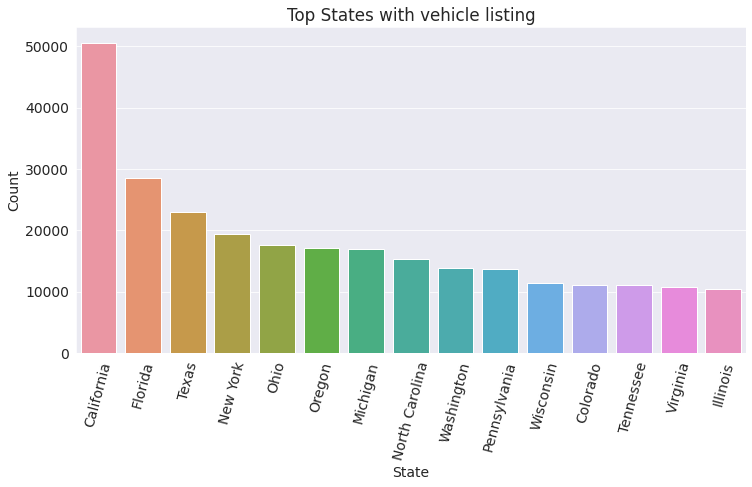

In [ ]:
plt.figure(figsize =(12,6))
plt.xticks(rotation = 75)
plt.title('Top States with vehicle listing')
sns.barplot(x='State', y ='Count', data = top_states_df);

According to the graph, **California** has the highest number of vehicle listing, more than 50000.

### 2. Which are the top regions in California with the highest number of vehicle listings?

In [ ]:
# Filtering the rows containing the state value 'California'
top_regions_ca = vehicles_df[vehicles_df.state == 'California'].region.value_counts()
top_regions_ca = pd.DataFrame({'Region':top_regions_ca.index, 'Count':top_regions_ca.values})
top_regions_ca

,Region,Count
0,fresno / madera,2983
1,stockton,2977
2,modesto,2973
3,sacramento,2970
4,san diego,2953
5,orange county,2952
6,inland empire,2950
7,los angeles,2937
8,SF bay area,2936
9,reno / tahoe,2876


We can visuallize this information using horizontal bar plots.

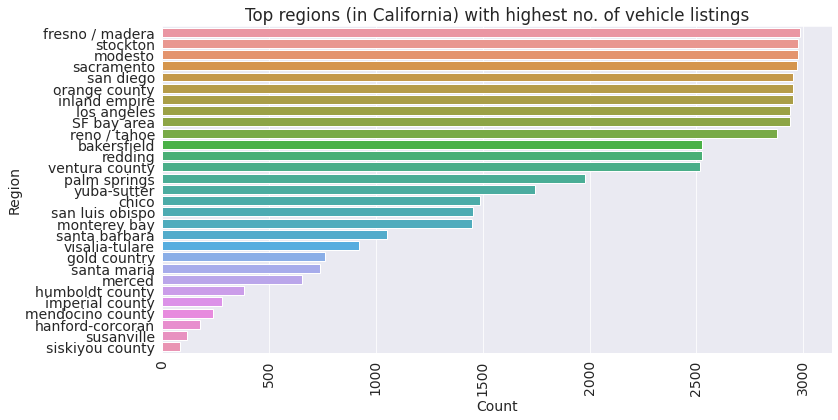

In [ ]:
# Horizontal Histogram plot for top regions (in California)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 90)
plt.title('Top regions (in California) with highest no. of vehicle listings')
sns.barplot(x='Count', y = 'Region', data=top_regions_ca);


As it can be seen from the above chart, '`fresno/madera`' has the highest listing of vehicles.

### 3. What is the trend of vehicle listing each year?

In [ ]:
# value_counts - for finding unique value frequencies
year_counts = vehicles_df['year'].value_counts()
year_counts_df = pd.DataFrame({'Year': year_counts.index, 'yr_Count': year_counts.values})
year_counts_df

,Year,yr_Count
0,2017.0,36420
1,2018.0,36369
2,2015.0,31538
3,2013.0,30794
4,2016.0,30434
...,...,...
109,1943.0,1
110,1915.0,1
111,1902.0,1
112,1905.0,1


The trend for vehicle lising can be represented using `line plot`

Text(0.5, 1.0, 'Vehicle listing trend over the years')

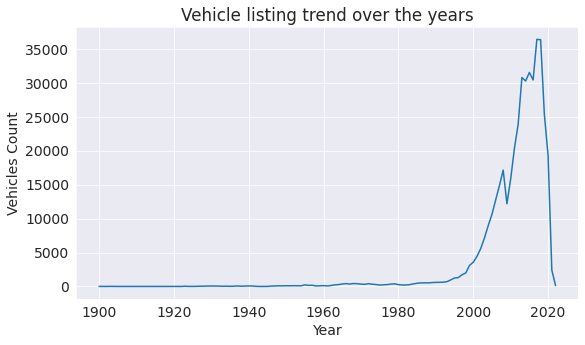

In [ ]:
sns.lineplot(data =year_counts_df, x="Year", y="yr_Count");
plt.xlabel('Year');
plt.ylabel('Vehicles Count')
plt.title("Vehicle listing trend over the years")

According to the graph, it can be observed that the number of vehicles being listed increased drastically after the year `2000`.

### 4. What is the trend for no. of cylinders for vehicles from the year 1900-2020?

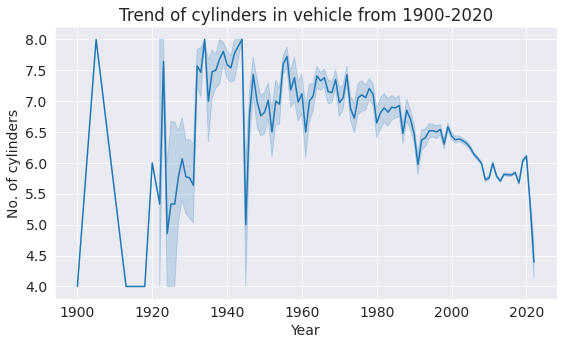

In [ ]:
sns.lineplot(data=vehicles_df, x="year",y="cylinders");
plt.xlabel('Year');
plt.ylabel('No. of cylinders');
plt.title("Trend of cylinders in vehicle from 1900-2020");

The graph depicts that till late `1990's` 6-cylinder engine vehicles were mostly prominent. However the decline between the years `1910 - 1930` may be the result of missing `(NaN)` values in the dataset.

### 5. Which fuel type vehicle is mostly listed ?

In [ ]:
fuel_df = vehicles_df['fuel'].value_counts()
fuel_df = pd.DataFrame({'Fuel':fuel_df.index, 'Count':fuel_df.values})
fuel_df

,Fuel,Count
0,gas,356209
1,other,30728
2,diesel,30062
3,hybrid,5170
4,electric,1698


In [ ]:
value = fuel_df['Fuel']
count = fuel_df['Count']

In [ ]:
fig = px.pie(fuel_df, values = 'Count' , names = 'Fuel' , title = 'Overall percentage of fuel type vehicles listed')
fig.show()

About `84%` of the USA vehicles listed on Craiglist is using `gas` as its fuel.

### 6. Which type of cylinder engine vehicle is likely to be more expensive?

In [ ]:
# Scatter plot to estimate the distribution of cylinders w.r.t price
fig = px.scatter(vehicles_df, y="price", x="cylinders", title='Cylinder-price overview')

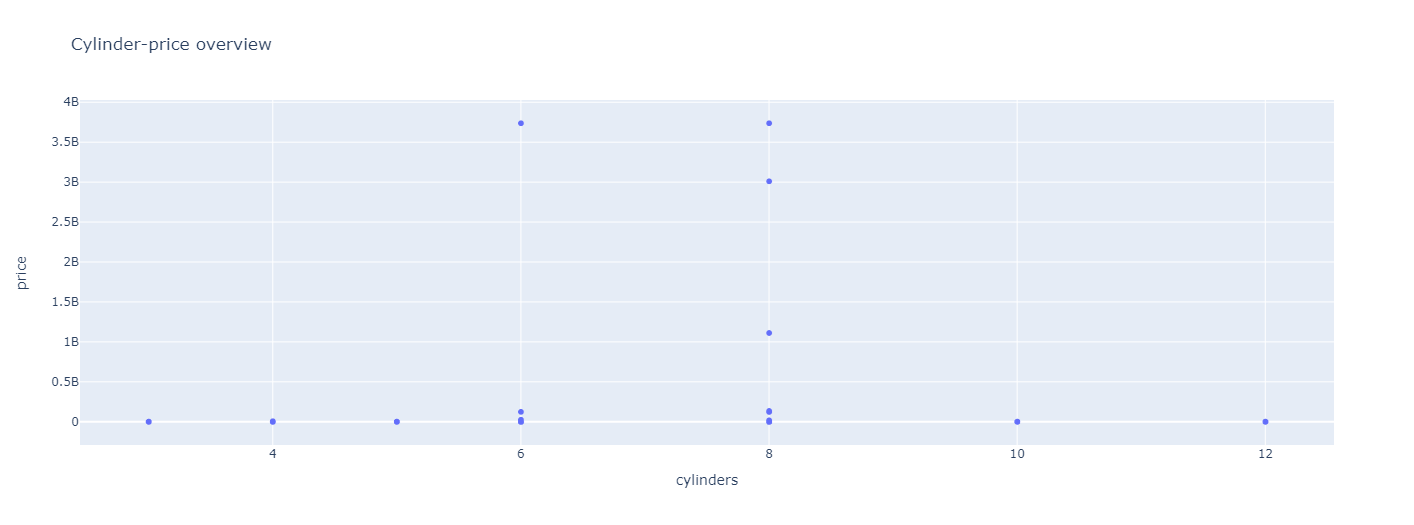

According to the graph, 8 cylinder engine vehicles are likely to be more expensive

### 7. Which areas in US have most expensive vehicles?

In [ ]:
state_avg_value = vehicles_df[['price','state']].groupby(["state"]).mean().reset_index()

In [ ]:
import numpy as np
import folium
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

In [ ]:
state_avg_value['price'] = np.log10(state_avg_value['price'])

In [ ]:
#ChoroplethMap

#state_avg_value_log= np.log(state_avg_value['price'])
myscale = np.linspace(state_avg_value['price'].min(), state_avg_value['price'].max(), 10)

#bins = list(state_avg_value['price'].quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    data=state_avg_value,
    columns=["state", "price"],
    key_on="feature.properties.name",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Price(log) in $",
    bins= myscale,
    reset=True,
).add_to(m)

m

According to the chloropeth graph, coastal areas of USA have more expensive vehicles.

### 8. What is the overall `condition` of used vehicles being listed?

In [ ]:
odo_df = vehicles_df['condition'].value_counts()
odo_df = pd.DataFrame({'Condition':odo_df.index, 'Count':odo_df.values})
odo_df

,Condition,Count
0,good,121456
1,excellent,101467
2,like new,21178
3,fair,6769
4,new,1305
5,salvage,601


In [ ]:
value1 = odo_df['Condition']
count1 = odo_df['Count']

In [ ]:
# Pie chart to estimate overall distribution on condition of vehicles
fig = px.pie(odo_df, values = 'Count' , names = 'Condition' , title = 'Overall condition of the vehicles listed')
fig.show()

As can be seen from above, 48% of the vehicles on Craiglist is in Good condition.

### 9. Which fuel type is mostly used for `f-150` model by `Ford` over the years?

In [ ]:
f150_df = vehicles_df[(vehicles_df.manufacturer == 'ford') & (vehicles_df.model == 'f-150')]

In [ ]:
f150_df.fuel.value_counts()

gas       7447
other      507
diesel      24
hybrid       1
Name: fuel, dtype: int64

According to the above table data, `gas` fuel type is most used by the `f-150` `ford` model.

### 10. How does the `odometer` values affect `price` of vehicles listed from 2015?

In [ ]:
df10 = vehicles_df.dropna()[['year','odometer','price','condition']].query("year > 2015")

In [ ]:
df10 = df10.sort_values('year', ignore_index=True)
df10

,year,odometer,price,condition
0,2016.0,94282.0,1,excellent
1,2016.0,33500.0,48600,excellent
2,2016.0,40000.0,24999,excellent
3,2016.0,74600.0,43181,excellent
4,2016.0,57499.0,14627,like new
...,...,...,...,...
14882,2021.0,5025.0,82900,excellent
14883,2021.0,34.0,67003,new
14884,2022.0,1000000.0,12345,fair
14885,2022.0,300.0,0,new


In [ ]:
# Scatter plot for distribution of price w.r.t condition
fig = px.scatter(df10, x="odometer", y="price", log_x = True, size="price", color= "condition", hover_name = "year",title='Distribution of price w.r.t the condition of vehicles from 2015')
fig.show()

As can be seen from chart, `odometer` values lesser than 1000 generally have higher price value, although the `price` of the vehicle also depends on the `condition` of the vehicle.

## Summary

We have worked on an EDA for used vehicles listed on Craiglist.

*   The dataset was downloaded and pre-precessed.
*   Various features (columns) of the data was anlysed visually using various visualization charts.
*   Some insights about the data was explored by asking intutive Questions and exploring the Answers.

    Some insights are:-
1.   Gas as fuel is more widely used in USA than other fuel types.
2.   Number of cylinders in vehicle have reduced overtime.
3.   Coastal areas are more likey to have expensive vehicles.
4.   Majority of the vehicles listed are in `good` and `excellent` condition. 
















## Future Works

Some other EDA projects on relevant topics, most prefereably from Kaggle will be explored.

## References
* https://github.com/JovianML/opendatasets
* https://www.kaggle.com/austinreese/craigslist-carstrucks-data
* https://pandas.pydata.org/docs/index.html
* https://www.fonz.net/blog/archives/2008/04/06/csv-of-states-and-state-abbreviations/
* https://seaborn.pydata.org/index.html
* https://matplotlib.org/
* https://plotly.com/python/

